In [1]:
#PER MIGLIORARE
#mettere regrid dei pimean nella cella in cui li calcola


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import glob
from climtools import climtools_lib as ctl
import xarray as xr
import matplotlib.cbook as cbook
from scipy import stats
import pickle


No DISPLAY variable set. Switching to agg backend


In [3]:
#DIRECTORY
cart_out = '/home/rotoli/codici/'
ctl.mkdir(cart_out)

cart_in = '/nas/archive_CMIP6/CMIP6/model-output/EC-Earth-Consortium/EC-Earth3/'
filin_pi = cart_in + 'piControl/atmos/Amon/r1i1p1f1/{}/*nc'
filin_4c = cart_in + 'abrupt-4xCO2/atmos/Amon/r8i1p1f1_r25/{}/*nc'
filin_4c1 = cart_in + 'abrupt-4xCO2/atmos/Amon/r8i1p1f1/{}/*nc'

In [4]:
#Kernel
cart_k = '/data-hobbes/fabiano/radiative_kernels/Huang/toa/'

finam = 'RRTMG_{}_toa_{}_highR.nc'

vnams = ['t', 'ts', 'wv_lw', 'wv_sw', 'alb']
tips = ['clr', 'cld']

allkers = dict()

for tip in tips:
    for vna in vnams:
        ker = xr.load_dataset(cart_k + finam.format(vna, tip))

        allkers[(tip, vna)] = ker

vlevs = xr.load_dataset(cart_k + 'dp.nc')

k = allkers[('cld', 't')].lwkernel

In [5]:
allkers[('clr', 'alb')].mean(), allkers[('cld', 'alb')].mean()

(<xarray.Dataset>
 Dimensions:   ()
 Data variables:
     swkernel  float32 -1.934,
 <xarray.Dataset>
 Dimensions:   ()
 Data variables:
     swkernel  float32 -1.444)

In [6]:
allvars = ' rlutcs rsutcs clt hus rlut rsds rsus rsut ta tas ts'.split()

pimean = dict()
for vernam in allvars:
     print(vernam)
     pimean[vernam] = pickle.load(open(cart_out + 'amoc_all_1000_' + vernam + '.p', 'rb'))


rlutcs
rsutcs
clt
hus
rlut
rsds
rsus
rsut
ta
tas
ts


In [7]:
# #leggi pi e calcola pi mean
# #variabili 
# allvars = ' rlutcs rsutcs clt hus rlut rsds rsus rsut ta tas ts'.split()

# #pimean = dict()
# for vernam in allvars:
#      print(vernam)
#      filist = glob.glob(filin_pi.format(vernam))
#      filist.sort()

#      var = xr.open_mfdataset(filist, use_cftime=True)

#      var_mean = var.mean('time')

#      var_mean = ctl.regrid_dataset(var_mean, k.lat, k.lon)

#      pimean[vernam] = var_mean[vernam].compute()

#      pickle.dump(pimean[vernam], open(cart_out + 'amoc_all_1000_' + vernam + '.p', 'wb'))

# #poi calcolo albedo
# pimean[('alb')] = pimean[('rsus')]/pimean[('rsds')]

# pickle.dump(pimean['alb'], open(cart_out + 'amoc_all_1000_alb.p', 'wb'))

In [8]:
num_year = 50

In [9]:
##calcolare tropopausa (Reichler 2003) 
#ho usato solo def di gradiente in funzione di pressione

filist = glob.glob(filin_4c.format('ta'))
filist.sort()
temp = xr.open_mfdataset(filist[:num_year])

A=(temp.plev/temp['ta'])*(9.81/1005)
laps1=(temp['ta'].diff(dim='plev'))*A  #derivata sulla verticale = laspe-rate
laps1=laps1.where(laps1<=-2)
mask = laps1/laps1

In [10]:
mask = mask.compute()

In [11]:
plt.figure()
temp['ta'].sel(time = slice('2010-01-01', '2015-01-01'), lat = slice(-20, 20)).mean(['time', 'lat', 'lon']).plot(y = 'plev', ylim = (1.e5, 1.), yscale = 'log')

In [12]:
temp['ta'].sel(time = slice('2010-01-01', '2015-01-01'), lat = slice(60, 90)).mean(['time', 'lat', 'lon']).plot(y = 'plev', ylim = (1.e5, 1.), yscale = 'log')

In [13]:
mask = mask.compute()

In [14]:
mm = mask.mean('time').compute()

In [15]:
%matplotlib inline

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point



[<Figure size 1500x1200 with 19 Axes>]

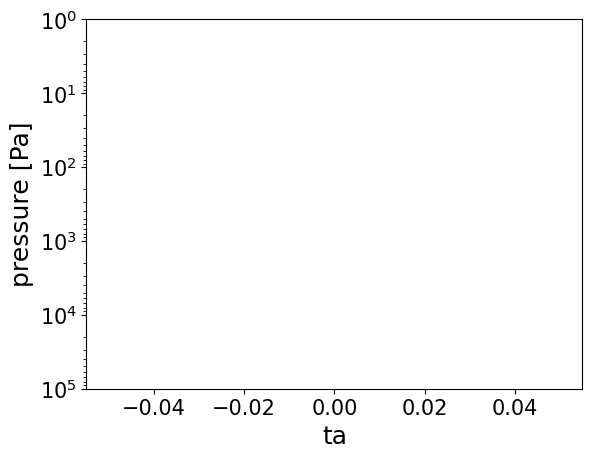

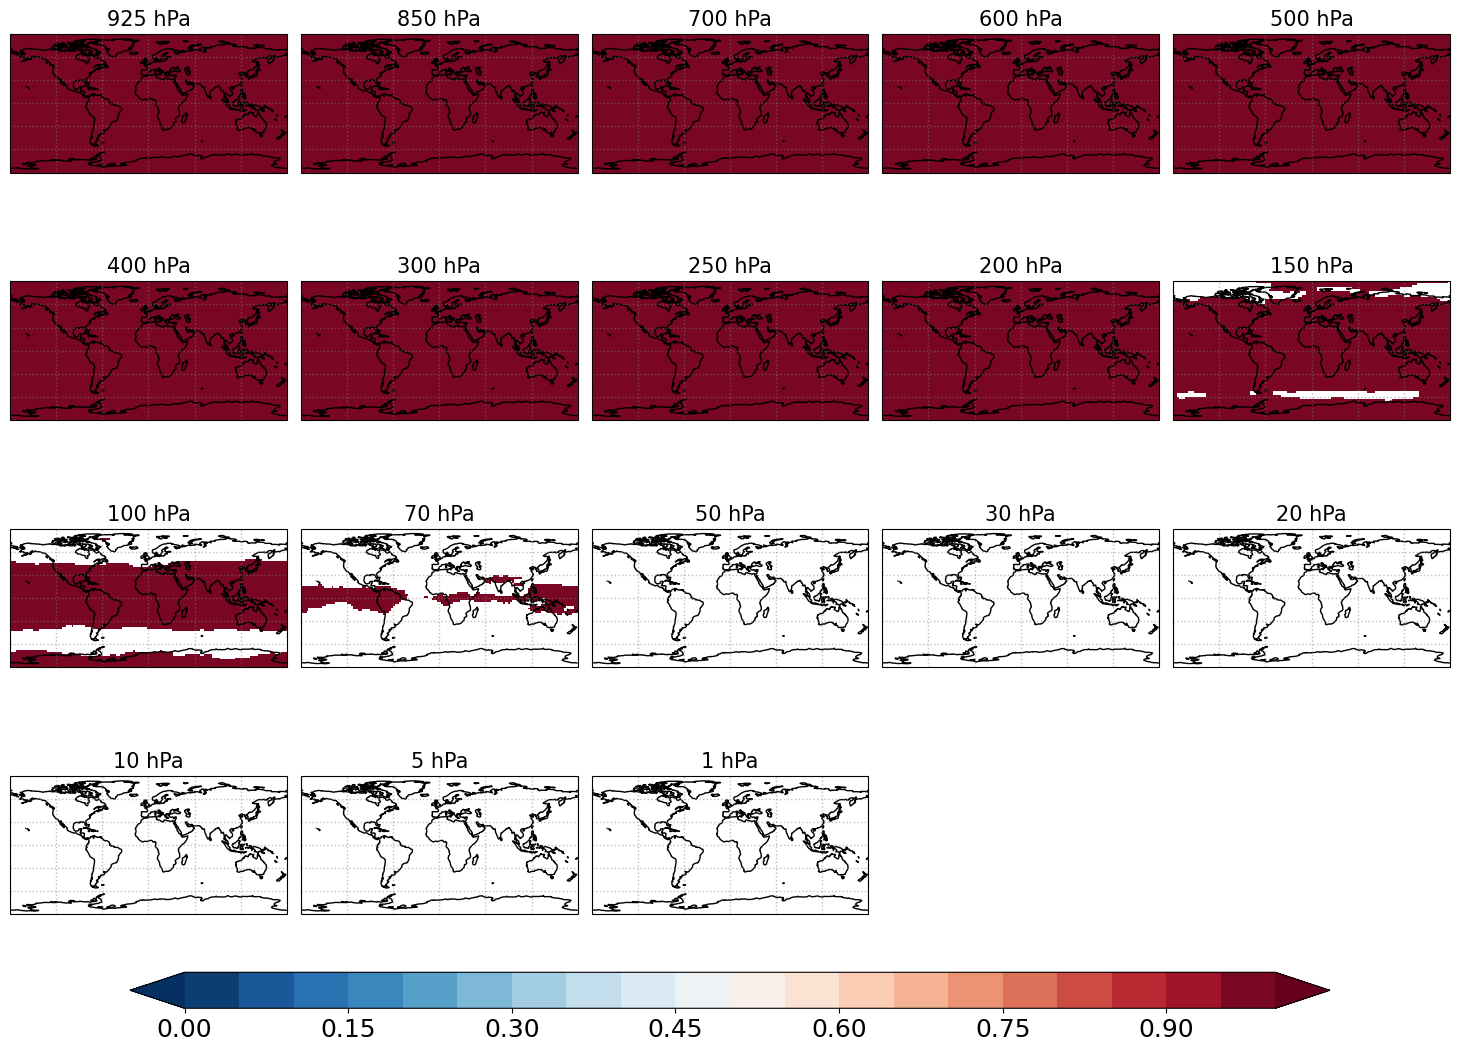

In [16]:
ctl.plot_multimap_contour([mm[i] for i in range(len(mm.plev))], cbar_range = (0, 1), subtitles = [f'{int(lev.values/100)} hPa' for lev in mm.plev])

In [17]:
%matplotlib inline

In [18]:
ps = xr.open_mfdataset('/home/fabiano/work_big/irods_move/stabilization-hist-1990/r1i1p1f1/Amon/ps/ps_Amon_EC-Earth3_stabilization-hist-1990_r1i1p1f1_gr_199?01-199?12.nc')
psclim = ps.groupby('time.month').mean()
psye = psclim['ps'].mean('month')
psye_rg = ctl.regrid_dataset(psye, k.lat, k.lon)

Regridding...
Regridding completed in 0:00:03.733705


Adding cyclic point



<GeoAxes: >

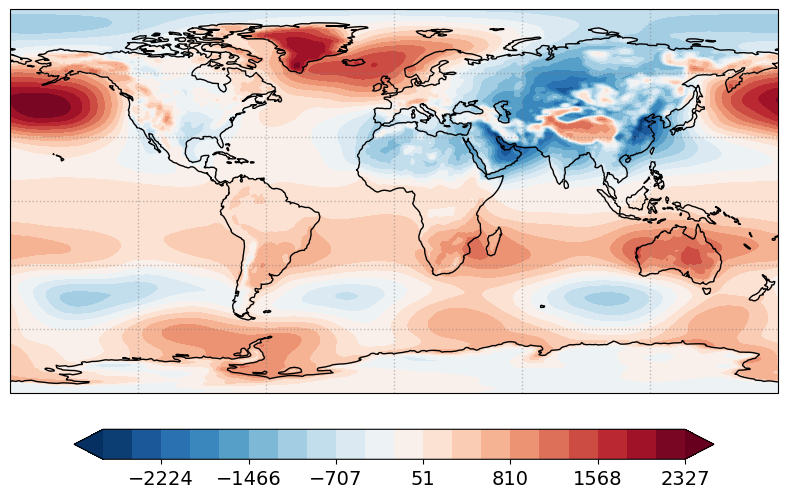

In [19]:
ctl.plot_map_contour(psclim['ps'][6]-psclim['ps'][0])

Adding cyclic point



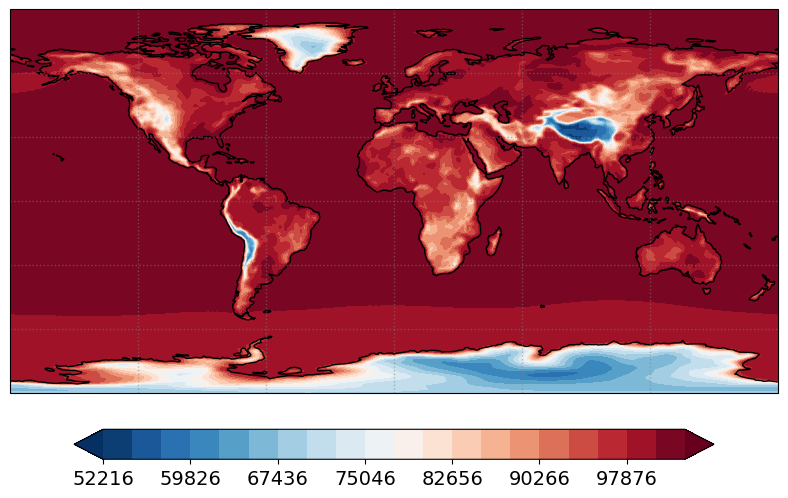

In [20]:
fig = ctl.plot_map_contour(psye)

In [21]:
ps2 = xr.open_mfdataset('/home/fabiano/work_big/irods_move/stabilization-ssp585-2100/r1i1p1f1/Amon/ps/ps_Amon_EC-Earth3_stabilization-ssp585-2100_r1i1p1f1_gr_300?01-300?12.nc')
psclim2 = ps2.groupby('time.month').mean()
psye2 = psclim2['ps'].mean('month')

/home/fabiano/miniforge3/envs/globothon/lib/python3.11/site-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/fabiano/miniforge3/envs/globothon/lib/python3.11/site-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/fabiano/miniforge3/envs/globothon/lib/python3.11/site-packages/xarray/core/indexing.py:560: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/home/fabiano/miniforge3/envs/globoth

Adding cyclic point



<GeoAxes: >

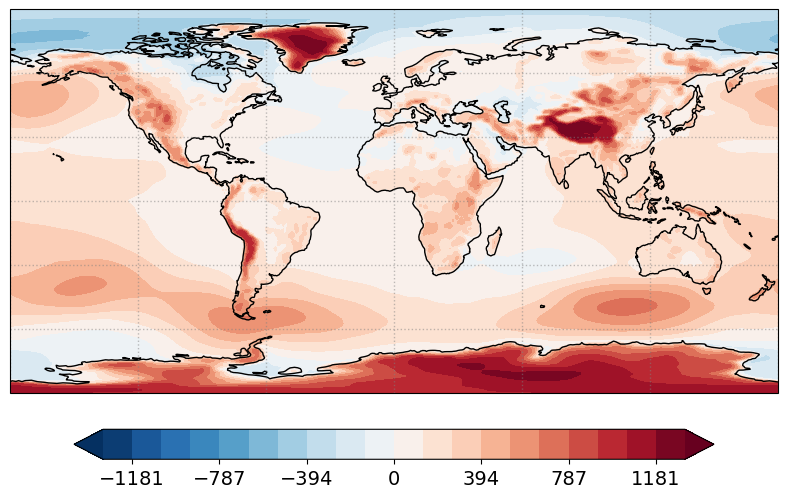

In [22]:
ctl.plot_map_contour(psye2-psye, plot_anomalies=True)

In [23]:
vlevs.player

<xarray.DataArray 'player' (player: 24)>
array([1000. ,  975. ,  950. ,  925. ,  900. ,  875. ,  850. ,  825. ,  800. ,
        775. ,  725. ,  625. ,  525. ,  425. ,  325. ,  237.5,  187.5,  137.5,
         85. ,   40. ,   15. ,    6. ,    2.5,    1. ], dtype=float32)
Coordinates:
  * player   (player) float32 1e+03 975.0 950.0 925.0 900.0 ... 15.0 6.0 2.5 1.0
Attributes:
    units:    hPa

In [24]:
psye_rg = psye_rg.compute()

In [25]:
### Mask for surf pressure

wid_mask = np.empty([len(vlevs.player)] + list(psye_rg.shape))

# for ii, (lev, wid) in enumerate(zip(vlevs.player, vlevs.dp)):
#     ps_mask[ii] = psye - lev
#     ps_mask[ps_mask < 0.] = np.nan

for ila in range(len(psye_rg.lat)):
    print(ila)
    for ilo in range(len(psye_rg.lon)):
        ind = np.where((psye_rg[ila, ilo].values/100. - vlevs.player.values) > 0)[0][0]
        wid_mask[:ind, ila, ilo] = np.nan
        wid_mask[ind, ila, ilo] = psye_rg[ila, ilo].values/100. - vlevs.player.values[ind]
        wid_mask[ind+1:, ila, ilo] = vlevs.dp.values[ind+1:]



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


In [26]:
vlevs.dp

<xarray.DataArray 'dp' (player: 24)>
array([ 25.5,  25. ,  25. ,  25. ,  25. ,  25. ,  25. ,  25. ,  25. ,
        25. ,  87.5, 100. , 100. , 100. , 100. ,  62.5,  50. ,  50. ,
        52.5,  35. ,  16.5,   4.5,   2.5,   1. ], dtype=float32)
Coordinates:
  * player   (player) float32 1e+03 975.0 950.0 925.0 900.0 ... 15.0 6.0 2.5 1.0

In [27]:
wid_mask.shape

(24, 73, 144)

In [28]:
np.nanmin(wid_mask), np.nanmax(wid_mask)

(0.0014062499999454303, 100.0)

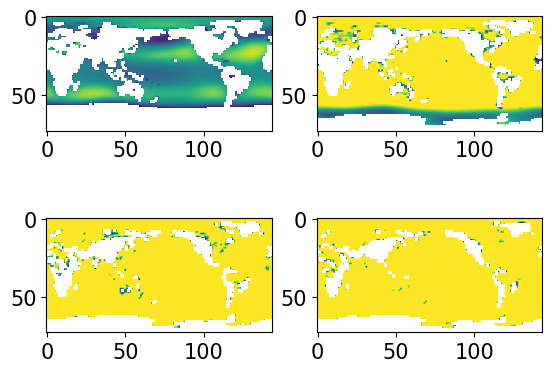

In [29]:
fig, axs = plt.subplots(2,2)

axs[0,0].imshow(wid_mask[0], vmin = 0., vmax = 25.)
axs[0,1].imshow(wid_mask[1], vmin = 0., vmax = 25.)
axs[1,0].imshow(wid_mask[2], vmin = 0., vmax = 25.)
axs[1,1].imshow(wid_mask[3], vmin = 0., vmax = 25.)
#plt.colorbar()

In [30]:
#ctl.plot_map_contour(wid_mask[0], lat = psye.lat.values, lon = psye.lon.values)

In [31]:
#ctl.plot_multimap_contour([wid_mask[i] for i in range(9)], lat = psye.lat.values, lon = psye.lon.values)#, subtitles = [f'{int(lev.values/100)} hPa' for lev in vlevs.player])

In [32]:
feedbacks = dict()
cose = 100*vlevs.player

In [33]:
#calcolo per ts_anom e gtas
filist = glob.glob(filin_4c.format('ts'))
filist.sort()
var = xr.open_mfdataset(filist[:num_year])

#pimean[('ts')] = pickle.load(open(cart_out + 'amoc_all_1000_ts.p', 'rb'))
pivar = ctl.regrid_dataset(pimean['ts'], k.lat, k.lon) 
var = ctl.regrid_dataset(var['ts'], k.lat, k.lon) 

piok = pivar.compute()
var = var.compute()

anoms = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok)
anoms.compute()
ts_anom = anoms
gtas = ctl.global_mean(anoms).groupby('time.year').mean('time')
#pickle.dump(gtas, open(cart_out + 'feedback_gtas.p', 'wb'))
#pickle.dump(ts_anom, open(cart_out + 'ts_anom.p', 'wb'))               

Regridding...
Regridding completed in 0:00:00.162232
Regridding...
Regridding completed in 0:00:00.155634


Regridding...
Regridding completed in 0:00:00.217143
Regridding...
Regridding completed in 0:00:00.972853


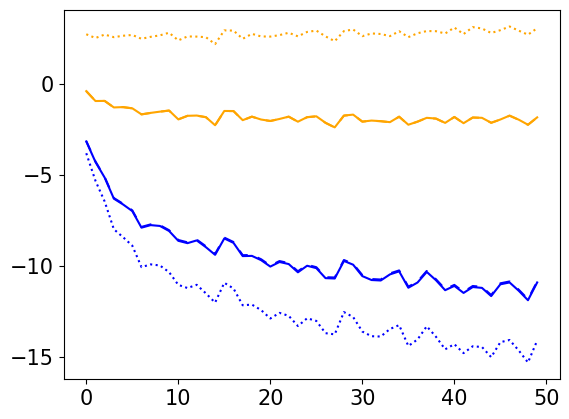

In [34]:
#PROVA CALCOLO TROPOPAUSA VARIABILE

filist = glob.glob(filin_4c.format('ta'))
filist.sort()
var = xr.open_mfdataset(filist[:num_year])
var = var['ta']
var = ctl.regrid_dataset(var, k.lat, k.lon)
pimean[('ta')] = pickle.load(open(cart_out + 'amoc_all_1000_ta.p', 'rb'))
pivar = ctl.regrid_dataset(pimean[('ta')], k.lat, k.lon)
piok = pivar.compute()
var = var.compute()

ta_abs = var.interp(plev = cose )

anoms_ok = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok)

anoms_ok = anoms_ok*mask
anoms_ok = anoms_ok.interp(plev = cose) 
#pickle.dump(anoms_ok, open(cart_out + 'feedback_'+ tip + 'anoms_ok.p', 'wb'))

for tip in ['clr','cld']:
    kernel = allkers[(tip, 't')].lwkernel
    anoms_lr = (anoms_ok - ts_anom)  
    anoms_unif = (anoms_ok - anoms_lr)#dovrei levare il meno
    anoms_lr = anoms_lr.compute()
    anoms_unif=anoms_unif.compute()

    dRt_unif = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_unif.groupby('time.month'), kernel) * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    dRt_unif_ps = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, anoms_unif.groupby('time.month'), kernel, wid_mask/100.)).sum('player').groupby('time.year').mean('time')

    #plt.figure()
    #dRt_unif.mean(dim='year').plot(color = 'blue')
    #dRt_unif_ps.mean(dim='year').plot(color = 'orange')
    # plt.title("Atmospheric Planck Feedback")
    # plt.savefig('feedback_planck-atmo.pdf')

    dRt_lr = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_lr.groupby('time.month'), kernel) * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    dRt_lr_ps = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, anoms_lr.groupby('time.month'), kernel, wid_mask/100.)).sum('player').groupby('time.year').mean('time')

    #plt.figure()
    #dRt_lr.mean(dim='year').plot(color = 'blue')
    #dRt_lr_ps.mean(dim='year').plot(color = 'orange')
    # plt.title("Lapse-Rate Feedback")
    # plt.savefig('feedback_lapse-rate.pdf')

    dRt_unif_glob = ctl.global_mean(dRt_unif)
    dRt_lr_glob = ctl.global_mean(dRt_lr)
    dRt_unif_glob_ps = ctl.global_mean(dRt_unif_ps)
    dRt_lr_glob_ps = ctl.global_mean(dRt_lr_ps)

    feedbacks[( tip, 'planck-atmo')] = dRt_unif_glob
    feedbacks[( tip, 'lapse-rate')] = dRt_lr_glob
    feedbacks[( tip, 'planck-atmo_ps')] = dRt_unif_glob_ps
    feedbacks[( tip, 'lapse-rate_ps')] = dRt_lr_glob_ps

    if tip == 'clr':
        plt.figure()
        plt.plot(dRt_unif_glob, color = 'blue')
        plt.plot(dRt_unif_glob_ps, color = 'blue', ls = '--')

        plt.plot(dRt_lr_glob, color = 'orange')
        plt.plot(dRt_lr_glob_ps, color = 'orange', ls = '--')

    #pickle.dump(dRt_unif_glob, open(cart_out + 'feedback_'+ tip + '_planck-atmo(mask).p', 'wb'))
    #pickle.dump(dRt_lr_glob, open(cart_out + 'feedback_'+ tip + '_lapse-rate(mask).p', 'wb'))

### ora senza mask in strato

anoms_ok = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok)
anoms_ok = anoms_ok.interp(plev = cose) 
#pickle.dump(anoms_ok, open(cart_out + 'feedback_'+ tip + 'anoms_ok.p', 'wb'))

#tip = 'clr'
# fig, axs = plt.subplots(1, 2)
# for tip, ax in zip(['clr','cld'], axs):
for tip in ['clr','cld']:
    kernel = allkers[(tip, 't')].lwkernel
    anoms_lr = (anoms_ok - ts_anom)  
    anoms_unif = (anoms_ok - anoms_lr)#dovrei levare il meno
    anoms_lr = anoms_lr.compute()
    anoms_unif=anoms_unif.compute()

    dRt_unif_wstrat = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_unif.groupby('time.month'), kernel) * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    #dRt_unif_ps = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, anoms_unif.groupby('time.month'), kernel, wid_mask/100.)).sum('player').groupby('time.year').mean('time')

    #plt.figure()
    #dRt_unif.mean(dim='year').plot(color = 'blue')
    #dRt_unif_ps.mean(dim='year').plot(color = 'orange')
    # plt.title("Atmospheric Planck Feedback")
    # plt.savefig('feedback_planck-atmo.pdf')

    dRt_lr_wstrat = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_lr.groupby('time.month'), kernel) * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    #dRt_lr_ps = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, anoms_lr.groupby('time.month'), kernel, wid_mask/100.)).sum('player').groupby('time.year').mean('time')

    #plt.figure()
    #dRt_lr.mean(dim='year').plot(color = 'blue')
    #dRt_lr_ps.mean(dim='year').plot(color = 'orange')
    # plt.title("Lapse-Rate Feedback")
    # plt.savefig('feedback_lapse-rate.pdf')

    dRt_unif_glob_wstrat = ctl.global_mean(dRt_unif_wstrat)
    dRt_lr_glob_wstrat = ctl.global_mean(dRt_lr_wstrat)

    feedbacks[( tip, 'planck-atmo_wstrat')] = dRt_unif_glob_wstrat
    feedbacks[( tip, 'lapse-rate_wstrat')] = dRt_lr_glob_wstrat

    if tip == 'clr':
        plt.plot(dRt_unif_glob_wstrat, color = 'blue', ls = ':')
        plt.plot(dRt_lr_glob_wstrat, color = 'orange', ls = ':')


In [35]:
#calcolo planck-surf(ts) 
filist = glob.glob(filin_4c.format('ts'))
filist.sort()
var = xr.open_mfdataset(filist[:num_year])

pimean[('ts')] = pickle.load(open(cart_out + 'amoc_all_1000_ts.p', 'rb'))
pivar = ctl.regrid_dataset(pimean[('ts')], k.lat, k.lon) 
var = ctl.regrid_dataset(var['ts'], k.lat, k.lon) 

piok = pivar.compute()
var = var.compute()

anoms = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok)
anoms.compute()

for tip in ['clr', 'cld']:
    kernel = allkers[(tip, 'ts')].lwkernel

    dRt = xr.apply_ufunc(lambda x, ker: x*ker, anoms.groupby('time.month'), kernel).groupby('time.year').mean('time')

    #plt.figure()
    #dRt.mean(dim='year').plot(cmap='GnBu', label='feedback')
    #plt.title("Surface Planck Feedback")
    #plt.savefig('feedback_planck-surf.pdf')

    dRt_glob = ctl.global_mean(dRt)
    feedbacks[( tip, 'planck-surf')] = dRt_glob
    #pickle.dump(feedbacks[( tip, 'planck-surf')], open(cart_out + 'feedback_'+ tip + '_planck-surf.p', 'wb'))
            

Regridding...
Regridding completed in 0:00:00.161041
Regridding...
Regridding completed in 0:00:00.153890


In [36]:
#calcolo planck atmo e lapse rate (tutto) non dovrei usarlo

# filist = glob.glob(filin_4c.format('ta'))
# filist.sort()
# var = xr.open_mfdataset(filist)
# var = var['ta']
# var = ctl.regrid_dataset(var, k.lat, k.lon)
# pimean[('ta')] = pickle.load(open(cart_out + 'amoc_all_1000_ta.p', 'rb'))
# pivar = ctl.regrid_dataset(pimean[('ta')], k.lat, k.lon)
# piok = pivar.compute()
# var = var.compute()

# ta_abs = var.interp(plev = cose ) 

# anoms = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok)
# anoms_ok = anoms.interp(plev = cose)

# for tip in ['clr', 'cld']:
#     kernel = allkers[(tip, 't')].lwkernel
#     anoms_lr = anoms_ok - tas_anom  
#     anoms_unif = anoms_ok - anoms_lr
    
#     dRt_unif = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_unif.groupby('time.month'), kernel) * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')

#     dRt_lr = (xr.apply_ufunc(lambda x, ker: x*ker, anoms_lr.groupby('time.month'), kernel) * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')

#     dRt_unif_glob = ctl.global_mean(dRt_unif)
#     dRt_lr_glob = ctl.global_mean(dRt_lr)
#     feedbacks[( tip, 'planck-atmo')] = dRt_unif_glob
#     feedbacks[( tip, 'lapse-rate')] = dRt_lr_glob
#     pickle.dump(feedbacks[( tip, 'planck-atmo')], open(cart_out + 'feedback_'+ tip + '_planck-atmo.p', 'wb'))
#     pickle.dump(feedbacks[( tip, 'lapse-rate')], open(cart_out + 'feedback_'+ tip + '_lapse-rate.p', 'wb'))

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point



[<Figure size 1500x1200 with 20 Axes>]

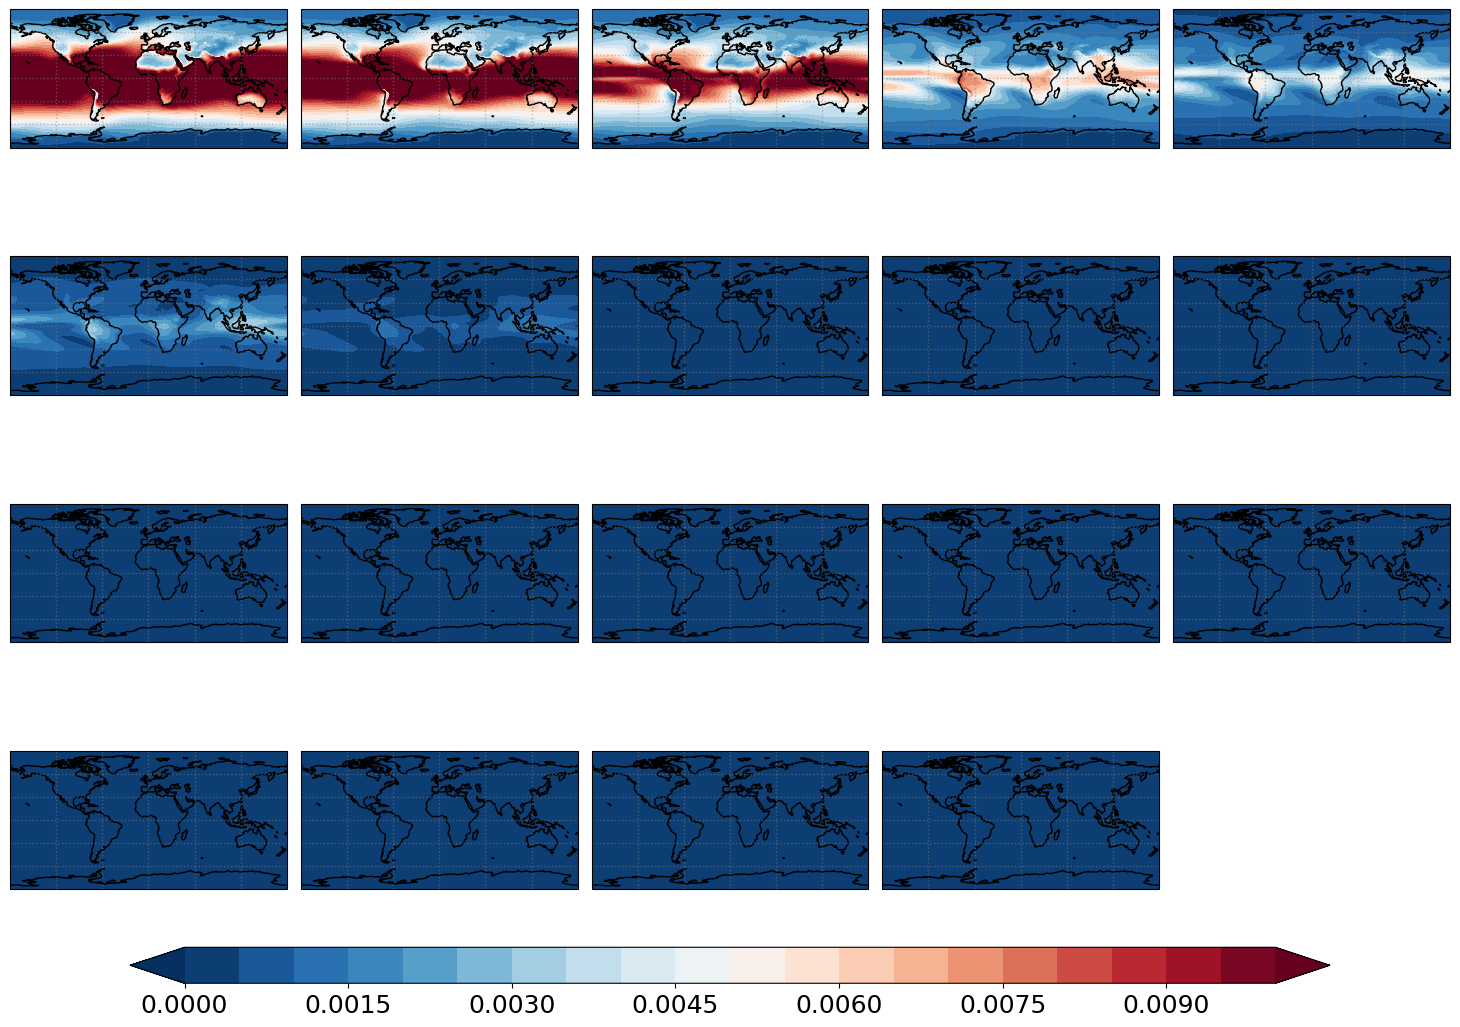

In [37]:
ctl.plot_multimap_contour(pimean['hus'], cbar_range = (0., 0.01))

Adding cyclic point



Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point



[<Figure size 1500x1200 with 20 Axes>]

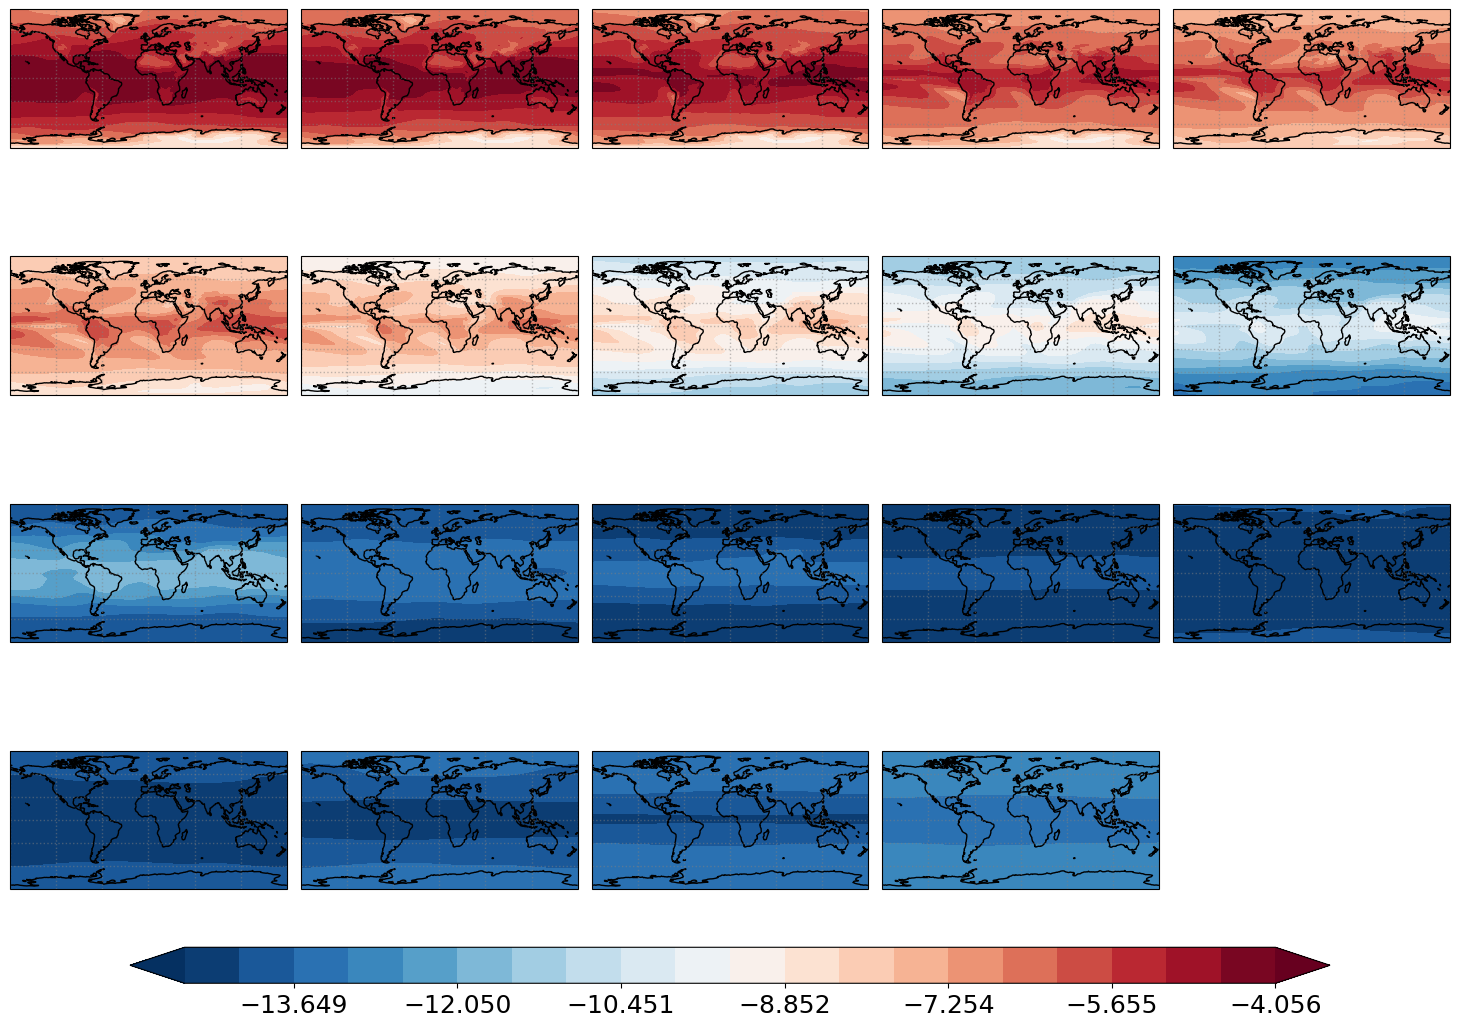

In [38]:
ctl.plot_multimap_contour(np.log(pimean['hus']))

Regridding...
Regridding completed in 0:00:00.341925
Regridding...
Regridding completed in 0:00:00.988000
(24, 73, 144)


NameError: name 'dRt_1' is not defined

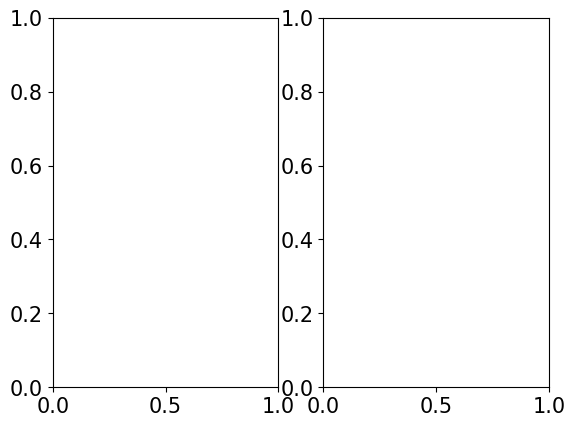

In [39]:
#calcolo water vapor
filist = glob.glob(filin_4c.format('hus'))
filist.sort()
var = xr.open_mfdataset(filist[:num_year])
var = var['hus']
var = ctl.regrid_dataset(var, k.lat, k.lon)
pimean[('hus')] = pickle.load(open(cart_out + 'amoc_all_1000_hus.p', 'rb'))
pivar = ctl.regrid_dataset(pimean[('hus')], k.lat, k.lon)
piok = pivar.compute()
var = var.compute()
# var = np.log(var)
# piok = np.log(piok)


#for tip in ['clr', 'cld']:
fig, axs = plt.subplots(1, 2)
for tip, ax in zip(['clr','cld'], axs):
    var_int = var.interp(plev = cose)
    piok_int = piok.interp(plev = cose)
    print(piok_int.shape)

    # anoms = xr.apply_ufunc(lambda x, mean: (x - mean)/mean, var_int.groupby('time.month'), piok_int)
    mask_int = mask.interp(plev = cose)
    # anoms_ok = anoms*mask_int
    anoms_ok1 = xr.apply_ufunc(lambda x, mean: (x - mean)/mean, var_int.groupby('time.month'), piok_int)
    anoms_ok2 = xr.apply_ufunc(lambda x, mean: x - mean, var_int.groupby('time.month'), piok_int)
    anoms_ok3 = xr.apply_ufunc(lambda x, mean: np.log(x) - np.log(mean), var_int.groupby('time.month'), piok_int)
    #anoms_ok = anoms.interp(plev = cose) 
    
    Rv = 487.5 # gas constant of water vapor
    Lv = 2.5e+06 # latent heat of water vapor
    kernel_lw = allkers[(tip, 'wv_lw')].lwkernel
    kernel_sw = allkers[(tip, 'wv_sw')].swkernel
    kernel = kernel_lw + kernel_sw

    #coso1 = anoms_ok1 * ta_abs**2 #why?
    coso1 = anoms_ok1 * mask_int * ta_abs**2 #why?
    coso1 = coso1.compute()

    coso2 = anoms_ok2 * ta_abs**2 #why?
    coso2 = coso2.compute()

    coso3 = anoms_ok3 * mask_int * ta_abs**2 #why?
    coso3 = coso3.compute()

    dRt_wstrat1 = (xr.apply_ufunc(lambda x, ker: x*ker, coso1.groupby('time.month'), kernel) * Rv/Lv * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    dRt_wstrat2 = (xr.apply_ufunc(lambda x, ker: x*ker, coso2.groupby('time.month'), kernel) * Rv/Lv * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    dRt_wstrat3 = (xr.apply_ufunc(lambda x, ker: x*ker, coso3.groupby('time.month'), kernel) * Rv/Lv * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')

    # anoms = xr.apply_ufunc(lambda x, mean: (x - mean)/mean, var_int.groupby('time.month'), piok_int)
    # mask_int = mask.interp(plev = cose)
    # anoms_ok = anoms*mask_int
    
    # # anoms = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok)
    # # anoms = anoms*mask
    # # anoms_ok = anoms.interp(plev = cose) 
    # coso = anoms_ok * ta_abs**2 #why?
    # coso = coso.compute()

    # dRt = (xr.apply_ufunc(lambda x, ker: x*ker, coso.groupby('time.month'), kernel) * Rv/Lv * vlevs.dp / 100.).sum('player').groupby('time.year').mean('time')
    # dRt_ps = (xr.apply_ufunc(lambda x, ker, wid: x*ker*wid, coso.groupby('time.month'), kernel, wid_mask/100.) * Rv/Lv).sum('player').groupby('time.year').mean('time')

    # plt.figure()
    # dRt.mean(dim='year').plot(cmap='GnBu')
    # plt.title("Water Vapor Feedback")
    # plt.savefig('feedback_water-vapor.pdf')

    # dRt_glob = ctl.global_mean(dRt)
    # dRt_glob_ps = ctl.global_mean(dRt_ps)
    dRt_glob_1 = ctl.global_mean(dRt_1)
    dRt_glob_2 = ctl.global_mean(dRt_2)
    dRt_glob_3 = ctl.global_mean(dRt_3)

    # feedbacks[( tip, 'water-vapor')] = dRt_glob
    feedbacks[( tip, 'water-vapor_1')] = dRt_glob_1
    feedbacks[( tip, 'water-vapor_3')] = dRt_glob_3
    # feedbacks[( tip, 'water-vapor_ps')] = dRt_glob_ps
    #pickle.dump(feedbacks[( tip, 'water-vapor')], open(cart_out + 'feedback_'+ tip + '_water-vapor.p', 'wb'))

    # plt.plot(dRt_glob, color = 'blue')
    # plt.plot(dRt_glob_ps, color = 'blue', ls = '--')
    ax.plot(dRt_glob_1, color = 'blue')
    ax.plot(dRt_glob_2, color = 'orange')
    ax.plot(dRt_glob_3, color = 'indianred')
    ax.title(tip)
         

In [49]:
stats.linregress(gtas, dRt_glob_wstrat1)

LinregressResult(slope=3.442305418028456, intercept=-1.4833773267551695, rvalue=0.9793982673228151, pvalue=5.226563249203172e-35, stderr=0.10244432777988761, intercept_stderr=0.4780126990742069)

In [50]:
stats.linregress(gtas, dRt_glob_wstrat3)

LinregressResult(slope=1.8700173944006118, intercept=-0.9833155212138482, rvalue=0.9895205679972005, pvalue=5.2664301121572096e-42, stderr=0.039386128222651674, intercept_stderr=0.18377854455977743)

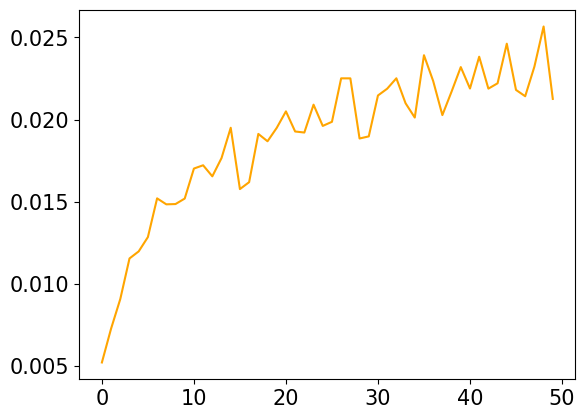

In [45]:
plt.plot(dRt_glob_wstrat2, color = 'orange')

In [228]:
#conto albedo

for tip in ['clr', 'cld']:
    filist_1 = glob.glob(filin_4c.format('rsus'))
    filist_1.sort()
    var_rsus = xr.open_mfdataset(filist_1[:num_year])['rsus']
    filist_2 = glob.glob(filin_4c.format('rsds'))
    filist_2.sort()
    var_rsds = xr.open_mfdataset(filist_2[:num_year])['rsds']
    var = var_rsus/var_rsds

    var = ctl.regrid_dataset(var, k.lat, k.lon)
    pimean[('alb')] = pickle.load(open(cart_out + 'amoc_all_1000_alb.p', 'rb'))
    pivar = ctl.regrid_dataset(pimean[('alb')], k.lat, k.lon) 

    piok = pivar.compute()
    var = var.compute()

    # Removing inf and nan from alb
    piok = piok.where(piok > 0., 0.)
    var = var.where(var > 0., 0.)
    anoms = xr.apply_ufunc(lambda x, mean: x - mean, var.groupby('time.month'), piok)

    kernel = allkers[(tip, 'alb')].swkernel

    dRt = xr.apply_ufunc(lambda x, ker: x*ker, anoms.groupby('time.month'), kernel).groupby('time.year').mean('time')
    
    # plt.figure()
    # dRt.mean(dim='year').plot(cmap='GnBu')
    # plt.title("Albedo Feedback")
    # plt.savefig('feedback_albedo.pdf')
   
    dRt_glob = ctl.global_mean(dRt)

    feedbacks[( tip, 'albedo')] = 100*dRt_glob
    #pickle.dump(feedbacks[( tip, 'albedo')], open(cart_out + 'feedback_'+ tip + '_albedo.p', 'wb'))
    

Regridding...
Regridding completed in 0:00:00.157222
Regridding...
Regridding completed in 0:00:00.916499
Regridding...
Regridding completed in 0:00:00.159657
Regridding...
Regridding completed in 0:00:00.912772


In [229]:
filist_1 = glob.glob(filin_4c.format('rsut'))
filist_1.sort()
var_rsut = xr.open_mfdataset(filist_1[:num_year])['rsut']
filist_2 = glob.glob(filin_4c.format('rsdt'))
filist_2.sort()
var_rsdt = xr.open_mfdataset(filist_2[:num_year])['rsdt']
filist_1 = glob.glob(filin_4c.format('rlut'))
filist_1.sort()
var_rlut = xr.open_mfdataset(filist_1[:num_year])['rlut']

net_toa = var_rsdt - var_rsut - var_rlut
net_toa = net_toa.compute()
net_toa_glob = ctl.global_mean(net_toa)

In [230]:
pivar_nettoa = var_rsdt.mean('time') - ctl.regrid_dataset(pimean['rsut'], k.lat, k.lon) - ctl.regrid_dataset(pimean['rlut'], k.lat, k.lon)
pivar_nettoa_glob = ctl.global_mean(pivar_nettoa.compute())

Regridding...
Regridding completed in 0:00:00.943430
Regridding...
Regridding completed in 0:00:00.877131


In [231]:
dRt_glob_tot = net_toa_glob.groupby('time.year').mean()-pivar_nettoa_glob

In [232]:
filist = glob.glob(filin_4c1.format('rsutcs')) 
filist.sort()
rsutcs = xr.open_mfdataset(filist[:num_year])['rsutcs']
rsutcs= ctl.regrid_dataset(rsutcs, k.lat, k.lon)

filist = glob.glob(filin_4c1.format('rlutcs'))
filist.sort()
rlutcs = xr.open_mfdataset(filist[:num_year])['rlutcs']
rlutcs = ctl.regrid_dataset(rlutcs, k.lat, k.lon)

filist_2 = glob.glob(filin_4c.format('rsdt'))
filist_2.sort()
var_rsdt = xr.open_mfdataset(filist_2[:num_year])['rsdt']
rsdt = ctl.regrid_dataset(var_rsdt, k.lat, k.lon)

net_toa_cs = rsdt - rsutcs - rlutcs
net_toa_cs = net_toa_cs.compute()
net_toa_glob_cs = ctl.global_mean(net_toa_cs)

Regridding...
Regridding completed in 0:00:00.889974
Regridding...
Regridding completed in 0:00:00.932933
Regridding...
Regridding completed in 0:00:00.161648


In [233]:
pivar_nettoa_cs = rsdt.mean('time') - ctl.regrid_dataset(pimean['rsutcs'], k.lat, k.lon) - ctl.regrid_dataset(pimean['rlutcs'], k.lat, k.lon)
pivar_nettoa_glob_cs = ctl.global_mean(pivar_nettoa_cs.compute())

Regridding...
Regridding completed in 0:00:00.180583
Regridding...
Regridding completed in 0:00:00.177024


In [234]:
pivar_nettoa_glob_cs

<xarray.DataArray ()>
array(17.0544, dtype=float32)

In [235]:
net_toa_glob_cs.groupby('time.year').mean()

<xarray.DataArray (year: 50)>
array([24.349993, 23.687513, 23.494879, 23.025698, 22.70754 , 22.412003,
       22.147215, 22.088163, 22.36709 , 22.117456, 21.756166, 21.887419,
       21.718445, 21.484583, 21.351618, 21.92961 , 21.672472, 21.33143 ,
       21.497583, 21.319435, 21.23109 , 21.240005, 21.229662, 21.05522 ,
       21.140738, 21.212845, 20.98524 , 20.822882, 21.335325, 21.406113,
       20.913984, 20.88336 , 21.009995, 20.853508, 20.87411 , 20.707201,
       20.888628, 20.94554 , 20.778519, 20.668177, 20.850405, 20.542948,
       20.784105, 20.555962, 20.485771, 20.723139, 20.9787  , 20.689064,
       20.583456, 20.837265], dtype=float32)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 1895 1896 1897 1898 1899

In [236]:
dRt_glob_tot_cs = net_toa_glob_cs.groupby('time.year').mean()-pivar_nettoa_glob_cs

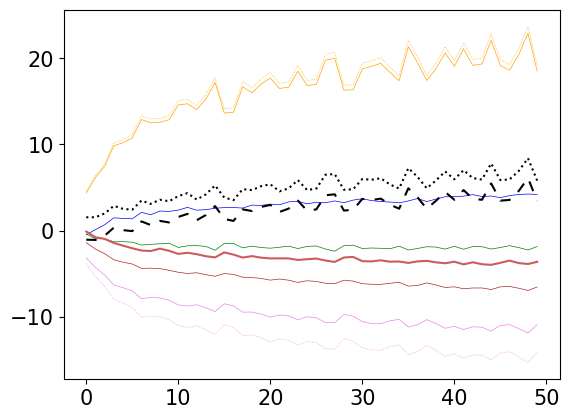

In [251]:
fig = plt.figure()

tip = 'clr'

allfb = ['albedo', 'water-vapor', 'lapse-rate', 'planck-atmo', 'planck-surf']
colorz = ['blue', 'orange', 'green', 'violet', 'brown']
for var, col in zip(allfb, colorz):
    plt.plot(feedbacks[(tip, var)], color = col, lw = 0.5)

#plt.plot(feedbacks[(tip, 'water-vapor')] + feedbacks[(tip, 'planck-atmo')], color = 'gold', lw = 2)

for var, col in zip(['water-vapor', 'planck-atmo'], ['orange', 'violet']):
    plt.plot(feedbacks[(tip, var+'_wstrat')], color = col, lw = 0.5, ls = ':')

# for var, col in zip(['water-vapor', 'planck-atmo'], ['orange', 'violet']):
#     plt.plot(feedbacks[(tip, var+'_wstrat')], color = col, lw = 0.5, ls = ':')

plt.plot(np.sum([feedbacks[(tip, var)] for var in allfb], axis = 0), color = 'black', ls = '--')
plt.plot(np.sum([feedbacks[(tip, var)] for var in ['albedo', 'planck-surf']] + [feedbacks[(tip, var+'_wstrat')] for var in ['water-vapor', 'lapse-rate', 'planck-atmo']], axis = 0), color = 'black', ls = ':')

plt.plot(dRt_glob_tot_cs-7.4, color = 'indianred')

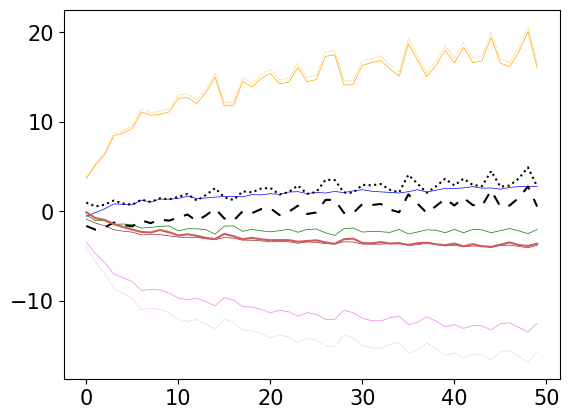

In [252]:
fig = plt.figure()

tip = 'cld'

allfb = ['albedo', 'water-vapor', 'lapse-rate', 'planck-atmo', 'planck-surf']
colorz = ['blue', 'orange', 'green', 'violet', 'brown']
for var, col in zip(allfb, colorz):
    plt.plot(feedbacks[(tip, var)], color = col, lw = 0.5)

#plt.plot(feedbacks[(tip, 'water-vapor')] + feedbacks[(tip, 'planck-atmo')], color = 'gold', lw = 2)

for var, col in zip(['water-vapor', 'planck-atmo'], ['orange', 'violet']):
    plt.plot(feedbacks[(tip, var+'_wstrat')], color = col, lw = 0.5, ls = ':')

# for var, col in zip(['water-vapor', 'planck-atmo'], ['orange', 'violet']):
#     plt.plot(feedbacks[(tip, var+'_wstrat')], color = col, lw = 0.5, ls = ':')

plt.plot(np.sum([feedbacks[(tip, var)] for var in allfb], axis = 0), color = 'black', ls = '--')
plt.plot(np.sum([feedbacks[(tip, var)] for var in ['albedo', 'planck-surf']] + [feedbacks[(tip, var+'_wstrat')] for var in ['water-vapor', 'lapse-rate', 'planck-atmo']], axis = 0), color = 'black', ls = ':')

plt.plot(dRt_glob_tot_cs-7.4, color = 'indianred')

In [238]:
print('test')

test


In [239]:
print('ciao')
sys.exit()

ciao


NameError: name 'sys' is not defined

In [ ]:
feedbacks = dict()

for tip in ['clr', 'cld']:
    for var in ['albedo', 'water-vapor', 'lapse-rate', 'planck-atmo', 'planck-surf']:
        feedbacks[(tip, var)] = pickle.load(open(cart_out + f'prima fase/feedback_{tip}_{var}.p', 'rb'))



In [ ]:
feedbacks.keys()

dict_keys([('clr', 'albedo'), ('clr', 'water-vapor'), ('clr', 'lapse-rate'), ('clr', 'planck-atmo'), ('clr', 'planck-surf'), ('cld', 'albedo'), ('cld', 'water-vapor'), ('cld', 'lapse-rate'), ('cld', 'planck-atmo'), ('cld', 'planck-surf')])

In [ ]:
fb_coef = pickle.load(open(cart_out + 'prima fase/feedback.p', 'wb'))


PermissionError: [Errno 13] Permission denied: '/home/rotoli/codici/prima fase/feedback.p'

In [ ]:

fbnams = ['planck-surf',  'water-vapor',  'albedo', 'lapse-rate(mask)', 'planck(mask)']

fb_coef = dict()

for tip in ['clr', 'cld']:
    for fbn in fbnams:
        gtas = pickle.load(open(cart_out + 'prima fase/feedback_gtas.p', 'rb'))
        coso = pickle.load(open(cart_out + 'prima fase/feedback_'+ tip + '_' + fbn + '.p', 'rb'))
        gtas= gtas.groupby((gtas.year-1) // 10 * 10).mean(dim='year')
        coso=coso.groupby((coso.year-1) // 10 * 10).mean(dim='year')

        res = stats.linregress(gtas, coso)
        fb_coef[(tip, fbn)] = res
#pickle.dump(fb_coef, open(cart_out + 'prima fase/feedback.p', 'wb'))


In [ ]:
gtas = pickle.load(open(cart_out + 'prima fase/feedback_gtas.p', 'rb'))

In [ ]:
gtas

NameError: name 'gtas' is not defined

In [ ]:
(gtas.year-1) // 10 * 10

<xarray.DataArray 'year' (year: 165)>
array([1840, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850, 1850,
       1860, 1860, 1860, 1860, 1860, 1860, 1860, 1860, 1860, 1860, 1870,
       1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1870, 1880, 1880,
       1880, 1880, 1880, 1880, 1880, 1880, 1880, 1880, 1890, 1890, 1890,
       1890, 1890, 1890, 1890, 1890, 1890, 1890, 1900, 1900, 1900, 1900,
       1900, 1900, 1900, 1900, 1900, 1900, 1910, 1910, 1910, 1910, 1910,
       1910, 1910, 1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1920,
       1920, 1920, 1920, 1920, 1930, 1930, 1930, 1930, 1930, 1930, 1930,
       1930, 1930, 1930, 1940, 1940, 1940, 1940, 1940, 1940, 1940, 1940,
       1940, 1940, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1980,
       1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1990, 1990,
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 2000, 2000, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2010, 2010, 2010, 2010])
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014

In [ ]:
###CLOUD FEEDBACK shell 2008

#gtas = pickle.load(open(cart_out + 'feedback_gtas.p', 'rb'))
fbnams = ['planck-surf', 'planck(mask)', 'lapse-rate(mask)', 'water-vapor', 'albedo']

filist = glob.glob(filin_4c.format('rlut'))
filist.sort()
rlut = xr.open_mfdataset(filist)['rlut']
 
filist = glob.glob(filin_4c.format('rsut'))
filist.sort()
rsut = xr.open_mfdataset(filist)['rsut']

filist = glob.glob(filin_4c1.format('rsutcs')) 
filist.sort()
rsutcs = xr.open_mfdataset(filist)['rsutcs']
rsutcs= ctl.regrid_dataset(rsutcs, k.lat, k.lon)

filist = glob.glob(filin_4c1.format('rlutcs'))
filist.sort()
rlutcs = xr.open_mfdataset(filist)['rlutcs']
rlutcs = ctl.regrid_dataset(rlutcs, k.lat, k.lon)

N = - rlut - rsut
N0 = - rsutcs - rlutcs

crf = (N0 - N) 
crf = crf.groupby('time.year').mean('time')

N = N.groupby('time.year').mean('time')
N0 = N0.groupby('time.year').mean('time')

crf_glob = ctl.global_mean(crf).compute()
N_glob = ctl.global_mean(N).compute()
N0_glob = ctl.global_mean(N0).compute()

crf_glob= crf_glob.groupby((crf_glob.year-1) // 10 * 10).mean(dim='year')
N_glob=N_glob.groupby((N_glob.year-1) // 10 * 10).mean(dim='year')
N0_glob=N0_glob.groupby((N0_glob.year-1) // 10 * 10).mean(dim='year')


res_N = stats.linregress(gtas, N_glob)
res_N0 = stats.linregress(gtas, N0_glob)
res_crf = stats.linregress(gtas, crf_glob)

pimean[('rlutcs')] =pickle.load(open(cart_out + 'amoc_all_1000_rlutcs.p', 'rb')) #già fatto il regrid per loro
pimean[('rsutcs')] =pickle.load(open(cart_out + 'amoc_all_1000_rsutcs.p', 'rb'))
pimean[('rsut')] =pickle.load(open(cart_out + 'amoc_all_1000_rsut.p', 'rb'))
pimean[('rlut')] =pickle.load(open(cart_out + 'amoc_all_1000_rlut.p', 'rb'))

F0 = res_N0.intercept + pimean[('rlutcs')] + pimean[('rsutcs')] 
F = res_N.intercept + pimean[('rlut')] + pimean[('rsut')]
F0.compute()
F.compute()

F_glob = ctl.global_mean(F)
F0_glob = ctl.global_mean(F0)
F_glob = F_glob.compute()
F0_glob = F0_glob.compute()

print(F0_glob-F_glob)

# fb_cloud = res_crf.slope + np.nansum([fb_coef[(exp, 'clr', fbn)].slope - fb_coef[(exp, 'cld', fbn)].slope for fbn in fbnams]) + (F0_glob - F_glob)/gtas[-5:].mean() ## as in Soden
fb_cloud2 = -res_crf.slope + np.nansum([fb_coef[( 'clr', fbn)].slope - fb_coef[('cld', fbn)].slope for fbn in fbnams]) #letto in Caldwell2016

fb_cloud_err2 = np.sqrt(res_crf.stderr**2 + np.nansum([fb_coef[('cld', fbn)].stderr**2 for fbn in fbnams]))

#pickle.dump(fb_cloud2, open(cart_out + 'prima fase/cloud_feedback.p', 'wb'))
#pickle.dump(fb_cloud_err2, open(cart_out + 'prima fase/clouderr_feedback.p', 'wb'))


Regridding...
Regridding completed in 0:00:02.554852
Regridding...
Regridding completed in 0:00:03.468176


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 165 and the array at index 1 has size 18

In [ ]:
#grafico feedback
fb_cloud2 = pickle.load(open(cart_out + 'prima fase/cloud_feedback.p', 'rb'))
fb_cloud_err2 = pickle.load(open(cart_out+'prima fase/clouderr_feedback.p', 'rb'))
ac = (fb_coef[('cld', 'planck-surf')].slope + fb_coef[('cld', 'planck(mask)')].slope)
data = [ac, fb_coef[('cld','lapse-rate(mask)')].slope, fb_coef[('cld', 'water-vapor')].slope, fb_coef[('cld', 'albedo')].slope, fb_cloud2]
data1 =[-3.24, -0.22,  1.72,  0.58, 0.29]
err = [(fb_coef[('cld', 'planck-surf')].stderr + fb_coef[('cld', 'planck(mask)')].stderr), fb_coef[('cld','lapse-rate(mask)')].stderr, fb_coef[('cld', 'water-vapor')].stderr, fb_coef[('cld', 'albedo')].stderr, fb_cloud_err2]
err1 = [0.05, 0.18, 0.14, 0.09, 0.36]
fbnams1 = ['planck', 'lapse-rate', 'water-vapor', 'albedo', 'cloud']
fig = plt.figure(figsize=(7,5))
offset=0.05
plt.errorbar(range(len(fbnams1)), data, yerr=err, marker=".", linestyle= 'None', label='calculated', color='royalblue')
plt.errorbar([x+offset for x in range(len(fbnams1))], data1, yerr=err1, marker=".", linestyle= 'None', label='by Zelinka et al. 2020', color='navy')
plt.xticks(range(len(fbnams1)), fbnams1)
plt.legend(loc='upper left')
plt.ylabel('[W $m^{-2}$ $K^{-1}$]')
#plt.title('Climate Feedback')

plt.savefig('prima fase/confronto(tropopausa variabile)_nuovo.pdf')

In [ ]:
#grafico feedback
ac = (fb_coef[('cld', 'planck-surf')].slope + fb_coef[('cld', 'planck(mask-lr)')].slope)
data = [ac, fb_coef[('cld','lapse-rate(mask)')].slope, fb_coef[('cld', 'water-vapor')].slope, fb_coef[('cld', 'albedo')].slope, fb_cloud2]
data1 =[-3.24, -0.22,  1.72,  0.58, 0.29]
err = [(fb_coef[('cld', 'planck-surf')].stderr + fb_coef[('cld', 'planck(mask-lr)')].stderr), fb_coef[('cld','lapse-rate(mask)')].stderr, fb_coef[('cld', 'water-vapor')].stderr, fb_coef[('cld', 'albedo')].stderr, fb_cloud_err2]
err1 = [0.05, 0.18, 0.14, 0.09, 0.36]
fbnams1 = ['planck', 'lapse-rate', 'water-vapor', 'albedo', 'cloud']
fig = plt.figure()
plt.errorbar(fbnams1, data, yerr=err, marker=".", linestyle= 'None', label='calcolati', color='y')
plt.errorbar(fbnams1, data1, yerr=err1, marker=".", linestyle= 'None', label='zelinka', color='m')
plt.xticks(rotation=20) 
plt.legend(loc='upper left')

plt.savefig('confronto(tropopausa variabile-lr).pdf')